# Importing libraries and dataframe

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#import cleaned anglers dataframe
df_anglers = pd.read_csv(r'C:\Users\Selena\Desktop\6-17-22 Michigan Anglers\02 Data\Prepared\cleaned_categories_anglers_size_stocking_plankton_combined.csv', index_col=False)
path = r'C:\Users\Selena\Desktop\6-17-22 Michigan Anglers'
df_anglers = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'cleaned_categories_anglers_size_stocking_plankton_combined.csv'), index_col=False)

# Quick review and possible cleaning

In [4]:
df_anglers.head()

,Unnamed: 0,category,species,waterbody,lake,merge,datetime,date caught,time caught,year,...,Average of PRED_Num/m3,stocked_category,PRED_category,CAL_category,CALIM_category,CALIM_category2,CYC_category,CYCIM_category,DAP_category,NDAP_category
0,0,Catch and Keep,yellow perch,Lake Huron,HU,lk_huron,1997-04-26 09:00:00,1997-04-26,9:00:00,1997,...,8.010978,Low,Average,Average,High,High,Average,Average,High,Average
1,1,Catch and Keep,rock bass,Lake Erie,ER,lk_erie,1997-09-02 14:00:00,1997-09-02,14:00:00,1997,...,266.657650,Low,High,Average,High,High,High,High,High,High
2,2,Catch and Keep,smallmouth bass,Lake Erie,ER,lk_erie,1997-07-11 13:30:00,1997-07-11,13:30:00,1997,...,266.657650,Low,High,Average,High,High,High,High,High,High
3,3,Catch and Keep,brown trout,Lake Huron,HU,lk_huron,1997-07-06 11:00:00,1997-07-06,11:00:00,1997,...,8.010978,High,Average,Average,High,High,Average,Average,High,Average
4,4,Catch and Keep,brown trout,Lake Huron,HU,lk_huron,1997-08-16 12:00:00,1997-08-16,12:00:00,1997,...,8.010978,High,Average,Average,High,High,Average,Average,High,Average


In [5]:
#dropping unnamed column
df_anglers = df_anglers.drop('Unnamed: 0', axis=1)

In [6]:
df_anglers.head()

,category,species,waterbody,lake,merge,datetime,date caught,time caught,year,weight lbs,...,Average of PRED_Num/m3,stocked_category,PRED_category,CAL_category,CALIM_category,CALIM_category2,CYC_category,CYCIM_category,DAP_category,NDAP_category
0,Catch and Keep,yellow perch,Lake Huron,HU,lk_huron,1997-04-26 09:00:00,1997-04-26,9:00:00,1997,1.88,...,8.010978,Low,Average,Average,High,High,Average,Average,High,Average
1,Catch and Keep,rock bass,Lake Erie,ER,lk_erie,1997-09-02 14:00:00,1997-09-02,14:00:00,1997,1.00,...,266.657650,Low,High,Average,High,High,High,High,High,High
2,Catch and Keep,smallmouth bass,Lake Erie,ER,lk_erie,1997-07-11 13:30:00,1997-07-11,13:30:00,1997,5.56,...,266.657650,Low,High,Average,High,High,High,High,High,High
3,Catch and Keep,brown trout,Lake Huron,HU,lk_huron,1997-07-06 11:00:00,1997-07-06,11:00:00,1997,16.20,...,8.010978,High,Average,Average,High,High,Average,Average,High,Average
4,Catch and Keep,brown trout,Lake Huron,HU,lk_huron,1997-08-16 12:00:00,1997-08-16,12:00:00,1997,16.12,...,8.010978,High,Average,Average,High,High,Average,Average,High,Average


In [7]:
df_anglers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6996 entries, 0 to 6995
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   category                 6996 non-null   object 
 1   species                  6996 non-null   object 
 2   waterbody                6996 non-null   object 
 3   lake                     6996 non-null   object 
 4   merge                    6996 non-null   object 
 5   datetime                 6996 non-null   object 
 6   date caught              6996 non-null   object 
 7   time caught              6996 non-null   object 
 8   year                     6996 non-null   int64  
 9   weight lbs               6996 non-null   float64
 10  length in                6996 non-null   float64
 11  method                   6996 non-null   object 
 12  bait                     6996 non-null   object 
 13  time hour caught         6996 non-null   int64  
 14  state minimum length in 

In [9]:
df_anglers.shape

(6996, 32)

In [10]:
#null values
df_anglers.isnull().sum()

category                   0
species                    0
waterbody                  0
lake                       0
merge                      0
datetime                   0
date caught                0
time caught                0
year                       0
weight lbs                 0
length in                  0
method                     0
bait                       0
time hour caught           0
state minimum length in    0
number_stocked             0
Average of CAL_Num/m3      0
Average of CALIM_Num/m3    0
Average of CYC_Num/m3      0
Average of CYCIM_Num/m3    0
Average of DAP_Num/m3      0
Average of NDAP_Num/m3     0
Average of PRED_Num/m3     0
stocked_category           0
PRED_category              0
CAL_category               0
CALIM_category             0
CALIM_category2            0
CYC_category               0
CYCIM_category             0
DAP_category               0
NDAP_category              0
dtype: int64

In [11]:
df_anglers.duplicated().sum()

0

# dataframe imported as expected: exact number of records, no missing values and no duplicated rows

# Data prep for regression analysis

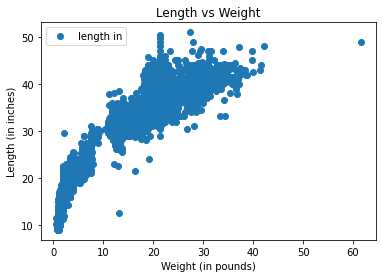

In [12]:
#I already know there is a relationship between length and weight
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_anglers.plot(x = 'weight lbs', y='length in',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Length vs Weight')  
plt.xlabel('Weight (in pounds)')  
plt.ylabel('Length (in inches)')  
plt.show()

#dependent y: length is the dependent variable; independent X: weight is the independent variable

#as length increased, weight also increases

In [13]:
#reshape the variables into numpy arrays
X = df_anglers['weight lbs'].values.reshape(-1,1)
y = df_anglers ['length in'].values.reshape (-1,1)

In [15]:
# see x
X

array([[1.88],
       [1.  ],
       [5.56],
       ...,
       [1.22],
       [1.75],
       [0.87]])

In [16]:
# see y
y

array([[14.5 ],
       [11.13],
       [21.5 ],
       ...,
       [10.  ],
       [14.63],
       [ 9.13]])

In [17]:
#split the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

# Regression analysis

In [18]:
#create a regression object
regression = LinearRegression() #this is the regression object we will fit on the training set

In [19]:
#fit the regression to the train set
regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

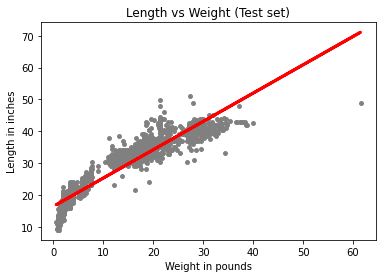

In [21]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Length vs Weight (Test set)')
plot_test.xlabel('Weight in pounds')
plot_test.ylabel('Length in inches')
plot_test.show()

In [22]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [23]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.88977623]]
Mean squared error:  11.197549076223382
R2 score:  0.874867397378947


#The mean squared error is small, so the values may be a small distance from the line. The R2 score can be interpretted as 87%. This is a good fit.

In [24]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,40.38,42.609633
1,26.00,28.640147
2,16.13,18.185276
3,39.50,41.319458
4,34.50,36.203245
5,19.50,18.354333
6,23.25,23.105738
7,36.00,41.328356
8,31.00,34.868580
9,30.00,26.931776


#the actual length compared to the predicted length in the regression model

# Now to compare how the regression fits the training set

In [25]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [26]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [27]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.88977623]]
Mean squared error:  10.76657639607702
R2 score:  0.8791424511122641


#the result is pretty darn similar

In [28]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted_train.flatten()})
data.head(30)

,Actual,Predicted
0,42.50,35.357957
1,21.00,21.441857
2,29.00,26.931776
3,42.50,43.543898
4,10.50,17.491250
5,38.00,40.874570
6,22.00,21.441857
7,27.00,27.305482
8,42.50,45.581486
9,31.00,27.341073
